<a href="https://colab.research.google.com/github/yuzaffi/test-fpl-project/blob/main/run_fpl_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Update 2025 df

In [ ]:
from google.colab import drive
import os
import json
import xgboost as xgb

# Mount Google Drive
drive.mount('/content/drive')

# Directory where models were saved
save_dir = '/content/drive/MyDrive/fpl_analysis/models/xgb_models'

# Initialize dictionary to store loaded models and info
xgb_results = {}

# Helper function to load a single model
def load_xgb_model_and_info(model_name):
    model_path = os.path.join(save_dir, f"{model_name}.json")
    metrics_path = os.path.join(save_dir, f"{model_name}_metrics.json")
    params_path = os.path.join(save_dir, f"{model_name}_params.json")

    # Load model
    model = xgb.XGBRegressor()
    model.load_model(model_path)

    # Load metrics
    with open(metrics_path, 'r') as f:
        metrics = json.load(f)

    # Load parameters
    with open(params_path, 'r') as f:
        best_params = json.load(f)

    # Combine into dict
    xgb_results[model_name] = {
        "model": model,
        "metrics": metrics,
        "best_params": best_params
    }

# Load all models in the folder
for file in os.listdir(save_dir):
    if file.endswith(".json") and not file.endswith("_metrics.json") and not file.endswith("_params.json"):
        model_name = file.replace(".json", "")
        load_xgb_model_and_info(model_name)

print(f"Loaded {len(xgb_results)} models from {save_dir}")

Mounted at /content/drive
Loaded 10 models from /content/drive/MyDrive/fpl_analysis/models/xgb_models


In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [ ]:
# Load player df
file_path = '/content/drive/MyDrive/fpl_analysis/data/final_full_df.csv'
final_full_df = pd.read_csv(file_path)

In [ ]:
# Load features
file_path = '/content/drive/MyDrive/fpl_analysis/features/feature_lists.json'

# Load JSON
with open(file_path, 'r') as f:
    feature_dict = json.load(f)

features_G = feature_dict['features_G']
features_A = feature_dict['features_A']
features_GC = feature_dict['features_GC']
features_saves = feature_dict['features_saves']

In [ ]:
import requests

# Load teams_id for 2025-26
url = "https://fantasy.premierleague.com/api/bootstrap-static/"

# convert API to usable python dictionary
response = requests.get(url)
data = response.json()

teams_df = pd.json_normalize(data['teams'])
fpl_player_df = pd.json_normalize(data['elements'])

In [ ]:
df = final_full_df.copy()

In [ ]:
df = df[df['season'].isin(['2024-25', '2025-26'])]

# INSTEAD IMPORT FPL API PLAYERS DF FOR UPDATED RESULTS THEN CONCAT AND FEATURE FIX

In [ ]:
import requests
import pandas as pd
from tqdm import tqdm  # progress bar (optional, install with `pip install tqdm`)

# 1. Get all players from bootstrap-static
url_bootstrap = "https://fantasy.premierleague.com/api/bootstrap-static/"
headers = {"User-Agent": "Mozilla/5.0"}

response = requests.get(url_bootstrap, headers=headers)
response.raise_for_status()
players = response.json()["elements"]

# Get all element_ids
element_ids = [p["id"] for p in players]

# 2. Loop through each player and collect history
all_histories = []

for element_id in tqdm(element_ids, desc="Fetching players"):
    url = f"https://fantasy.premierleague.com/api/element-summary/{element_id}/"
    try:
        r = requests.get(url, headers=headers)
        r.raise_for_status()
        data = r.json()

        history = pd.DataFrame(data.get("history", []))
        if not history.empty:
            history["element_id"] = element_id  # keep track of player
            all_histories.append(history)
    except requests.exceptions.RequestException:
        continue

# 3. Combine into one DataFrame
df_all_histories = pd.concat(all_histories, ignore_index=True)

print(df_all_histories.head())
print(df_all_histories.shape)

Fetching players: 100%|██████████| 746/746 [01:33<00:00,  7.98it/s]


   element  fixture  opponent_team  total_points  was_home  \
0        1        9             14            10     False   
1        1       11             11             6      True   
2        1       25             12             2     False   
3        1       31             16             6      True   
4        1       41             13             2      True   

           kickoff_time  team_h_score  team_a_score  round  modified  minutes  \
0  2025-08-17T15:30:00Z           0.0           1.0      1     False       90   
1  2025-08-23T16:30:00Z           5.0           0.0      2     False       90   
2  2025-08-31T15:30:00Z           1.0           0.0      3     False       90   
3  2025-09-13T11:30:00Z           3.0           0.0      4     False       90   
4  2025-09-21T15:30:00Z           1.0           1.0      5     False       90   

   goals_scored  assists  clean_sheets  goals_conceded  own_goals  \
0             0        0             1               0          0   
1 

In [ ]:
df.columns.tolist()

['season',
 'element',
 'price',
 'player',
 'position',
 'kickoff_time',
 'team_name',
 'opp_name',
 'GW',
 'home_status',
 'team_h_score',
 'team_a_score',
 'starts',
 'starts_last3',
 'starts_last10',
 'minutes',
 'minutes_last3',
 'minutes_last10',
 'total_points',
 'xP',
 'xGI',
 'G',
 'xG',
 'G_last3',
 'G_last10',
 'xG_last3',
 'xG_last10',
 'G_szn_avg',
 'xG_szn_avg',
 'G_per90',
 'G_per90_last3',
 'G_per90_last10',
 'G_per90_szn_avg',
 'xG_per90',
 'xG_per90_last3',
 'xG_per90_last10',
 'xG_per90_szn_avg',
 'A',
 'xA',
 'A_last3',
 'A_last10',
 'xA_last3',
 'xA_last10',
 'A_szn_avg',
 'xA_szn_avg',
 'A_per90',
 'A_per90_last3',
 'A_per90_last10',
 'A_per90_szn_avg',
 'xA_per90',
 'xA_per90_last3',
 'xA_per90_last10',
 'xA_per90_szn_avg',
 'ICT',
 'ICT_last3',
 'ICT_last10',
 'ICT_szn_avg',
 'influence',
 'influence_last3',
 'influence_last10',
 'influence_szn_avg',
 'creativity',
 'creativity_last3',
 'creativity_last10',
 'creativity_szn_avg',
 'threat',
 'threat_last3',
 'th

In [ ]:
df_all_histories.columns.tolist()

['element',
 'fixture',
 'opponent_team',
 'total_points',
 'was_home',
 'kickoff_time',
 'team_h_score',
 'team_a_score',
 'round',
 'modified',
 'minutes',
 'goals_scored',
 'assists',
 'clean_sheets',
 'goals_conceded',
 'own_goals',
 'penalties_saved',
 'penalties_missed',
 'yellow_cards',
 'red_cards',
 'saves',
 'bonus',
 'bps',
 'influence',
 'creativity',
 'threat',
 'ict_index',
 'clearances_blocks_interceptions',
 'recoveries',
 'tackles',
 'defensive_contribution',
 'starts',
 'expected_goals',
 'expected_assists',
 'expected_goal_involvements',
 'expected_goals_conceded',
 'value',
 'transfers_balance',
 'selected',
 'transfers_in',
 'transfers_out',
 'element_id']

In [ ]:
rename_map = {
    'minutes': 'minutes',
    'expected_goal_involvements': 'xGI',
    'goals_scored': 'G',
    'expected_goals': 'xG',
    'assists': 'A',
    'expected_assists': 'xA',
    'clean_sheets': 'CS',
    'goals_conceded': 'GC',
    'expected_goals_conceded': 'xGC',
    'penalties_saved': 'pen_save',
    'penalties_missed': 'pen_miss',
    'yellow_cards': 'YC',
    'red_cards': 'RC',
    'ict_index': 'ICT',
    'id': 'element',
    'element_type': 'position',
    'round': 'GW',
}

df_all_histories = df_all_histories.rename(columns=rename_map)

In [ ]:
# Align key names in histories first
df_all_histories = df_all_histories.rename(columns={'element': 'element', 'round': 'GW'})

# Stats to update (renamed ones you listed)
update_cols = [
    'team_h_score', 'team_a_score', 'total_points',
    'minutes', 'starts', 'G', 'xG', 'A', 'xA', 'xGI',
    'CS', 'GC', 'xGC',
    'ICT', 'influence', 'creativity', 'threat',
    'own_goals', 'pen_save', 'pen_miss', 'YC', 'RC',
    'saves', 'bonus', 'bps'
]

# Merge the history stats into df (match element + GW)
df = df.merge(
    df_all_histories[['element', 'GW'] + update_cols],
    on=['element', 'GW'],
    how='left',
    suffixes=('', '_hist')
)

# Overwrite df values with history values where available
for col in update_cols:
    df[col] = df[col + '_hist'].combine_first(df[col])
    df.drop(columns=[col + '_hist'], inplace=True)

# Ensure numeric columns are properly typed
for col in update_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
season_order = ['2024-25', '2025-26']
df['season'] = pd.Categorical(df['season'], categories=season_order, ordered=True)
df = df.sort_values(['player', 'season', 'GW']).copy()

# Update rolling averages

In [ ]:
# # List of stats to calculate rolling values for
# stats = ['xG', 'xA', 'G', 'A', 'ICT', 'influence', 'creativity', 'threat',
#          'xGC', 'GC', 'bps', 'saves', 'YC', 'minutes', 'starts']

# # Group by player to compute rolling stats
# rolling_df = df.groupby('player')[stats].rolling(3, min_periods=1).mean().reset_index(level=0, drop=True)
# df[[f'{col}_last3' for col in stats]] = rolling_df

# rolling_df_10 = df.groupby('player')[stats].rolling(10, min_periods=1).mean().reset_index(level=0, drop=True)
# df[[f'{col}_last10' for col in stats]] = rolling_df_10

# # Season average
# season_avg = df.groupby(['player', 'season'])[stats].transform('mean')
# df[[f'{col}_szn_avg' for col in stats]] = season_avg

In [ ]:
# List of stats to calculate rolling values for
stats = ['xG', 'xA', 'G', 'A', 'ICT', 'influence', 'creativity', 'threat',
         'xGC', 'GC', 'bps', 'saves', 'YC', 'minutes', 'starts']

# Rolling last 3 (per player, per season)
rolling_df_3 = (
    df.groupby(['player', 'season'])[stats]
      .rolling(3, min_periods=1)
      .mean()
      .reset_index(level=[0,1], drop=True)
)
df[[f'{col}_last3' for col in stats]] = rolling_df_3

# Rolling last 10 (per player, per season)
rolling_df_10 = (
    df.groupby(['player', 'season'])[stats]
      .rolling(10, min_periods=1)
      .mean()
      .reset_index(level=[0,1], drop=True)
)
df[[f'{col}_last10' for col in stats]] = rolling_df_10

# Season average (already correct, but included for completeness)
season_avg = df.groupby(['player', 'season'])[stats].transform('mean')
df[[f'{col}_szn_avg' for col in stats]] = season_avg

/tmp/ipython-input-2025615058.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['player', 'season'])[stats]
/tmp/ipython-input-2025615058.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['player', 'season'])[stats]
/tmp/ipython-input-2025615058.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_avg = df.groupby(['player', 'season'])[stats].transform('mean')


In [ ]:
# # List of stats to calculate per90 for
# stats = ['xG', 'G', 'xA', 'A', 'xGC', 'GC', 'saves']

# # Rolling windows
# windows = {'last3': 3, 'last10': 10}

# for stat in stats:
#     # per90 = stat / minutes * 90
#     df[f'{stat}_per90'] = df[stat] / df['minutes'] * 90

#     # Rolling averages (last3, last10)
#     for w_name, w_size in windows.items():
#         df[f'{stat}_per90_{w_name}'] = df.groupby('player')[f'{stat}_per90'].rolling(w_size, min_periods=1).mean().reset_index(0, drop=True)

#     # Season average
#     df[f'{stat}_per90_szn_avg'] = (
#     df.groupby(['player', 'season'], observed=True)[f'{stat}_per90']
#       .transform('mean')
# )

In [ ]:
# List of stats to calculate per90 for
stats = ['xG', 'G', 'xA', 'A', 'xGC', 'GC', 'saves']

# Rolling windows
windows = {'last3': 3, 'last10': 10}

for stat in stats:
    # per90 = stat / minutes * 90
    df[f'{stat}_per90'] = df[stat] / df['minutes'] * 90

    # Rolling averages (last3, last10) - per player, per season
    for w_name, w_size in windows.items():
        df[f'{stat}_per90_{w_name}'] = (
            df.groupby(['player', 'season'])[f'{stat}_per90']
              .rolling(w_size, min_periods=1)
              .mean()
              .reset_index(level=[0,1], drop=True)
        )

    # Season average (already season-aware)
    df[f'{stat}_per90_szn_avg'] = (
        df.groupby(['player', 'season'])[f'{stat}_per90']
          .transform('mean')
    )

/tmp/ipython-input-2046838234.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['player', 'season'])[f'{stat}_per90']
/tmp/ipython-input-2046838234.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['player', 'season'])[f'{stat}_per90']
/tmp/ipython-input-2046838234.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['player', 'season'])[f'{stat}_per90']
/tmp/ipython-input-204683

In [ ]:
df.head()

,season,element,price,player,position,kickoff_time,team_name,opp_name,GW,home_status,team_h_score,team_a_score,starts,starts_last3,starts_last10,minutes,minutes_last3,minutes_last10,total_points,xP,xGI,G,xG,G_last3,G_last10,xG_last3,xG_last10,G_szn_avg,xG_szn_avg,G_per90,G_per90_last3,G_per90_last10,G_per90_szn_avg,xG_per90,xG_per90_last3,xG_per90_last10,xG_per90_szn_avg,A,xA,A_last3,A_last10,xA_last3,xA_last10,A_szn_avg,xA_szn_avg,A_per90,A_per90_last3,A_per90_last10,A_per90_szn_avg,xA_per90,xA_per90_last3,xA_per90_last10,xA_per90_szn_avg,ICT,ICT_last3,ICT_last10,ICT_szn_avg,influence,influence_last3,influence_last10,influence_szn_avg,creativity,creativity_last3,creativity_last10,creativity_szn_avg,threat,threat_last3,threat_last10,threat_szn_avg,GC,xGC,GC_last3,GC_last10,xGC_last3,xGC_last10,GC_szn_avg,xGC_szn_avg,GC_per90,GC_per90_last3,GC_per90_last10,GC_per90_szn_avg,xGC_per90,xGC_per90_last3,xGC_per90_last10,xGC_per90_szn_avg,CS,YC,RC,YC_last3,YC_last10,YC_szn_avg,own_goals,pen_miss,bonus,bps,bps_last3,bps_last10,bps_szn_avg,saves,pen_save,saves_last3,saves_last10,saves_szn_avg,saves_per90,saves_per90_last3,saves_per90_last10,saves_per90_szn_avg,team_FDR,team_strength_overall_home,team_strength_overall_away,team_strength_attack_home,team_strength_attack_away,team_strength_defence_home,team_strength_defence_away,id,opp_FDR,opp_strength_overall_home,opp_strength_overall_away,opp_strength_attack_home,opp_strength_attack_away,opp_strength_defence_home,opp_strength_defence_away,team_strength_attack,opp_strength_attack,team_strength_defence,opp_strength_defence,team_strength_overall,opp_strength_overall,team_xG_last3,team_G_last3,team_xA_last3,team_A_last3,team_influence_last3,team_creativity_last3,team_threat_last3,team_xG_last10,team_G_last10,team_xA_last10,team_A_last10,team_influence_last10,team_creativity_last10,team_threat_last10,team_xGC_last3,team_xGC_last10,team_GC_last3,team_GC_last10,opp_xGC_last3,opp_xGC_last10,opp_GC_last3,opp_GC_last10,opp_xG_last3,opp_G_last3,opp_xA_last3,opp_A_last3,opp_influence_last3,opp_creativity_last3,opp_threat_last3,opp_xG_last10,opp_G_last10,opp_xA_last10,opp_A_last10,opp_influence_last10,opp_creativity_last10,opp_threat_last10,team_id,opp_id,minutes_szn_avg,starts_szn_avg
12768,2024-25,517,40,Aaron Cresswell,1,2024-08-17T16:30:00Z,West Ham,Aston Villa,1,1,3.0,1.0,1.0,1.0,1.0,90.0,90.0,90.0,6.0,1.0,0.67,0.0,0.39,0.0,0.0,0.390000,0.390000,0.0,0.036667,0.0,0.0,0.0,0.0,0.39,0.390000,0.390000,0.059231,1.0,0.28,1.000000,1.000000,0.280000,0.280000,0.047619,0.065238,1.0,1.000000,1.000000,0.076923,0.28,0.280000,0.280000,0.315594,7.0,7.000000,7.00,2.747619,28.6,28.6,28.6,9.32381,21.3,21.300000,21.3,14.404762,20.0,20.000000,20.0,3.666667,1.0,1.50,1.000000,1.000000,1.500000,1.500000,0.904762,0.806667,1.0,1.000000,1.000000,1.461538,1.50,1.500000,1.500000,2.513566,0.0,0.0,0.0,0.0,0.0,0.095238,0.0,0.0,1.0,24.0,24.000000,24.000000,9.190476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1090.0,1100.0,1090.0,1090.0,1090.0,1110.0,2.0,3.0,1145.0,1240.0,1130.0,1180.0,1160.0,1300.0,1090.0,1180.0,1090.0,1300.0,1090.0,1240.0,0.000000,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,1.590000,1.590000,2.0,2.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,19.0,2.0,44.428571,0.47619
12795,2024-25,517,40,Aaron Cresswell,1,2024-08-24T14:00:00Z,West Ham,Crystal Palace,2,0,1.0,1.0,1.0,1.0,1.0,90.0,90.0,90.0,2.0,0.5,0.03,0.0,0.00,0.0,0.0,0.195000,0.195000,0.0,0.036667,0.0,0.0,0.0,0.0,0.00,0.195000,0.195000,0.059231,0.0,0.03,0.500000,0.500000,0.155000,0.155000,0.047619,0.065238,0.0,0.500000,0.500000,0.076923,0.03,0.155000,0.155000,0.315594,3.9,5.450000,5.45,2.747619,17.2,22.9,22.9,9.32381,21.5,21.400000,21.4,14.404762,0.0,10.000000,10.0,3.666667,1.0,1.10,1.000000,1.000000,1.300000,1.300000,0.904762,0.806667,1.0,1.000000,1.000000,1.461538,1.10,1.300000,1.300000,2.513566,0.0,0.0,0.0,0.0,0.0,0.09

In [ ]:
df[df['player'] == 'Mohamed Salah']

,season,element,price,player,position,kickoff_time,team_name,opp_name,GW,home_status,team_h_score,team_a_score,starts,starts_last3,starts_last10,minutes,minutes_last3,minutes_last10,total_points,xP,xGI,G,xG,G_last3,G_last10,xG_last3,xG_last10,G_szn_avg,xG_szn_avg,G_per90,G_per90_last3,G_per90_last10,G_per90_szn_avg,xG_per90,xG_per90_last3,xG_per90_last10,xG_per90_szn_avg,A,xA,A_last3,A_last10,xA_last3,xA_last10,A_szn_avg,xA_szn_avg,A_per90,A_per90_last3,A_per90_last10,A_per90_szn_avg,xA_per90,xA_per90_last3,xA_per90_last10,xA_per90_szn_avg,ICT,ICT_last3,ICT_last10,ICT_szn_avg,influence,influence_last3,influence_last10,influence_szn_avg,creativity,creativity_last3,creativity_last10,creativity_szn_avg,threat,threat_last3,threat_last10,threat_szn_avg,GC,xGC,GC_last3,GC_last10,xGC_last3,xGC_last10,GC_szn_avg,xGC_szn_avg,GC_per90,GC_per90_last3,GC_per90_last10,GC_per90_szn_avg,xGC_per90,xGC_per90_last3,xGC_per90_last10,xGC_per90_szn_avg,CS,YC,RC,YC_last3,YC_last10,YC_szn_avg,own_goals,pen_miss,bonus,bps,bps_last3,bps_last10,bps_szn_avg,saves,pen_save,saves_last3,saves_last10,saves_szn_avg,saves_per90,saves_per90_last3,saves_per90_last10,saves_per90_szn_avg,team_FDR,team_strength_overall_home,team_strength_overall_away,team_strength_attack_home,team_strength_attack_away,team_strength_defence_home,team_strength_defence_away,id,opp_FDR,opp_strength_overall_home,opp_strength_overall_away,opp_strength_attack_home,opp_strength_attack_away,opp_strength_defence_home,opp_strength_defence_away,team_strength_attack,opp_strength_attack,team_strength_defence,opp_strength_defence,team_strength_overall,opp_strength_overall,team_xG_last3,team_G_last3,team_xA_last3,team_A_last3,team_influence_last3,team_creativity_last3,team_threat_last3,team_xG_last10,team_G_last10,team_xA_last10,team_A_last10,team_influence_last10,team_creativity_last10,team_threat_last10,team_xGC_last3,team_xGC_last10,team_GC_last3,team_GC_last10,opp_xGC_last3,opp_xGC_last10,opp_GC_last3,opp_GC_last10,opp_xG_last3,opp_G_last3,opp_xA_last3,opp_A_last3,opp_influence_last3,opp_creativity_last3,opp_threat_last3,opp_xG_last10,opp_G_last10,opp_xA_last10,opp_A_last10,opp_influence_last10,opp_creativity_last10,opp_threat_last10,team_id,opp_id,minutes_szn_avg,starts_szn_avg
7908,2024-25,328,125,Mohamed Salah,2,2024-08-17T11:30:00Z,Liverpool,Ipswich,1,0,1.0,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,5.0,0.00,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.65,0.563,NaN,NaN,NaN,0.693545,NaN,NaN,NaN,0.602900,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.5,0.1915,NaN,NaN,NaN,0.535651,NaN,NaN,NaN,0.208258,0.0,0.000000,0.000000,9.765,0.0,0.000000,0.000000,37.25,0.0,0.000000,0.000000,20.20,0.0,0.000000,0.000000,40.25,0.0,0.00,0.000000,0.000000,0.000000,0.000000,1.35,1.077,NaN,NaN,NaN,1.513681,NaN,NaN,NaN,1.228691,0.0,0.0,0.0,0.000000,0.000000,0.05,0.0,0.0,0.0,0.0,0.000000,0.000000,26.8,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,5.0,1350.0,1370.0,1320.0,1360.0,1380.0,1380.0,10.0,2.0,1065.0,1065.0,1040.0,1040.0,1090.0,1090.0,1360.0,1040.0,1380.0,1090.0,1370.0,1065.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,1.170000,1.170000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.0,NaN,81.75,0.95
7937,2024-25,328,125,Mohamed Salah,2,2024-08-25T15:30:00Z,Liverpool,Brentford,2,1,1.0,1.0,1.0,0.500000,0.500000,61.0,30.500000,30.500000,2.0,12.5,0.16,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.65,0.563,0.000000,0.000000,0.000000,0.693545,0.000000,0.000000,0.000000,0.602900,0.0,0.16,0.000000,0.000000,0.080000,0.080000,0.5,0.1915,0.000000,0.000000,0.000000,0.535651,0.236066,0.236066,0.236066,0.208258,3.2,1.600000,1.600000,9.765,11.0,5.500000,5.500000,37.25,15.4,7.700000,7.700000,20.20,6.0,3.000000,3.000000,40.25,1.0,1.52,0.500000,0.500000,0.760000,0.760000,1.35,1.077,1.475410,1.475410,1.475410,1.513681,2.242623,2

# Update team rolling averages

In [ ]:
teams_df.head()

,code,draw,form,id,loss,name,played,points,position,short_name,strength,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
0,3,0,None,1,0,Arsenal,0,0,1,ARS,5,None,False,0,1300,1375,1340,1400,1260,1350,1
1,7,0,None,2,0,Aston Villa,0,0,11,AVL,3,None,False,0,1145,1185,1150,1170,1140,1200,2
2,90,0,None,3,0,Burnley,0,0,17,BUR,3,None,False,0,1055,1095,1010,1090,1100,1100,43
3,91,0,None,4,0,Bournemouth,0,0,2,BOU,3,None,False,0,1150,1220,1100,1240,1200,1200,127
4,94,0,None,5,0,Brentford,0,0,12,BRE,3,None,False,0,1135,1175,1100,1110,1170,1240,130


In [ ]:
teams_df['season'] = '2025-26'

In [ ]:
teams_df = teams_df[[
    'season',
    'id',
    'name',
    'short_name',
    'strength',
    'strength_overall_home',
    'strength_overall_away',
    'strength_attack_home',
    'strength_attack_away',
    'strength_defence_home',
    'strength_defence_away'
]]

teams_df = teams_df.rename(columns={'name': 'club_name', 'strength': 'FDR'})

In [ ]:
# Drop old placeholders before merging
df.drop(columns=[
    'team_FDR', 'team_strength_overall_home', 'team_strength_overall_away',
    'team_strength_attack_home', 'team_strength_attack_away',
    'team_strength_defence_home', 'team_strength_defence_away',
    'opp_FDR', 'opp_strength_overall_home', 'opp_strength_overall_away',
    'opp_strength_attack_home', 'opp_strength_attack_away',
    'opp_strength_defence_home', 'opp_strength_defence_away'
], errors='ignore', inplace=True)

In [ ]:
# First, merge the player's own team info:
df = df.merge(
    teams_df[['season', 'club_name', 'FDR', 'strength_overall_home', 'strength_overall_away',
                'strength_attack_home', 'strength_attack_away', 'strength_defence_home', 'strength_defence_away']],
    how='left',
    left_on=['season', 'team_name'],
    right_on=['season', 'club_name']
)

# Rename the columns for player's own team to avoid confusion
own_team_cols = ['FDR', 'strength_overall_home', 'strength_overall_away',
                 'strength_attack_home', 'strength_attack_away', 'strength_defence_home', 'strength_defence_away']
df.rename(columns={col: f'team_{col}' for col in own_team_cols}, inplace=True)

# Drop the extra 'club_name' column after merge (to avoid confusion)
df.drop(columns=['club_name'], inplace=True)

# Next, merge opponent team info using opp_name and teams_df.id
df = df.merge(
    teams_df[['season', 'id', 'FDR', 'strength_overall_home', 'strength_overall_away',
              'strength_attack_home', 'strength_attack_away', 'strength_defence_home', 'strength_defence_away']],
    how='left',
    left_on=['season', 'opp_id'],
    right_on=['season', 'id'],
    suffixes=('', '_oppdup')  # temporary suffix in case of overlap
)
df.drop(columns=[col for col in df.columns if col.endswith('_oppdup')], inplace=True)

# Rename columns for opponent team
opp_team_cols = ['FDR', 'strength_overall_home', 'strength_overall_away',
                 'strength_attack_home', 'strength_attack_away', 'strength_defence_home', 'strength_defence_away']
df.rename(columns={col: f'opp_{col}' for col in opp_team_cols}, inplace=True)

df.drop(columns=['id'], inplace=True)

In [ ]:
## 1️⃣ Team attacking form (sum)
team_form = (
    df
    .groupby(['team_name', 'GW', 'season'], as_index=False)
    .agg({
        # last3
        'xG_last3': 'sum', 'G_last3': 'sum',
        'xA_last3': 'sum', 'A_last3': 'sum',
        'influence_last3': 'sum', 'creativity_last3': 'sum', 'threat_last3': 'sum',
        # last10
        'xG_last10': 'sum', 'G_last10': 'sum',
        'xA_last10': 'sum', 'A_last10': 'sum',
        'influence_last10': 'sum', 'creativity_last10': 'sum', 'threat_last10': 'sum',
    })
    .rename(columns={
        # last3
        'xG_last3': 'team_xG_last3', 'G_last3': 'team_G_last3',
        'xA_last3': 'team_xA_last3', 'A_last3': 'team_A_last3',
        'influence_last3': 'team_influence_last3', 'creativity_last3': 'team_creativity_last3', 'threat_last3': 'team_threat_last3',
        # last10
        'xG_last10': 'team_xG_last10', 'G_last10': 'team_G_last10',
        'xA_last10': 'team_xA_last10', 'A_last10': 'team_A_last10',
        'influence_last10': 'team_influence_last10', 'creativity_last10': 'team_creativity_last10', 'threat_last10': 'team_threat_last10',
    })
)

# 2️⃣ Team defensive form
team_def_form = (
    df
    .groupby(['team_name', 'GW', 'season'], as_index=False)
    .agg({
        'xGC_last3': 'max',
        'xGC_last10': 'max',
        'GC_last3': 'max',
        'GC_last10': 'max'
    })
    .rename(columns={
        'xGC_last3': 'team_xGC_last3',
        'xGC_last10': 'team_xGC_last10',
        'GC_last3': 'team_GC_last3',
        'GC_last10': 'team_GC_last10'
    })
)

# 3️⃣ Merge attacking and defensive forms into one dataframe
team_stats = team_form.merge(team_def_form, on=['team_name', 'GW', 'season'], how='left')

# 4️⃣ Add opponent names from fixtures (unique team-opponent-GW-season rows)
fixture_lookup = df[['team_name', 'opp_name', 'GW', 'season']].drop_duplicates()
team_stats = team_stats.merge(fixture_lookup, on=['team_name', 'GW', 'season'], how='left')

# 5️⃣ Merge opponent defensive form
team_stats = team_stats.merge(
    team_def_form.rename(columns={
        'team_name': 'opp_name',
        'team_xGC_last3': 'opp_xGC_last3',
        'team_xGC_last10': 'opp_xGC_last10',
        'team_GC_last3': 'opp_GC_last3',
        'team_GC_last10': 'opp_GC_last10'
    }),
    on=['opp_name', 'GW', 'season'],
    how='left'
)

# 6️⃣ Merge opponent attacking form
team_stats = team_stats.merge(
    team_form.rename(columns={
        'team_name': 'opp_name',
        'team_xG_last3': 'opp_xG_last3', 'team_G_last3': 'opp_G_last3',
        'team_xA_last3': 'opp_xA_last3', 'team_A_last3': 'opp_A_last3',
        'team_influence_last3': 'opp_influence_last3', 'team_creativity_last3': 'opp_creativity_last3', 'team_threat_last3': 'opp_threat_last3',
        'team_xG_last10': 'opp_xG_last10', 'team_G_last10': 'opp_G_last10',
        'team_xA_last10': 'opp_xA_last10', 'team_A_last10': 'opp_A_last10',
        'team_influence_last10': 'opp_influence_last10', 'team_creativity_last10': 'opp_creativity_last10', 'team_threat_last10': 'opp_threat_last10',
    }),
    on=['opp_name', 'GW', 'season'],
    how='left'
)

# 7️⃣ Final step
team_gw_stats = team_stats.copy()

In [ ]:
team_gw_stats.tail()

,team_name,GW,season,team_xG_last3,team_G_last3,team_xA_last3,team_A_last3,team_influence_last3,team_creativity_last3,team_threat_last3,team_xG_last10,team_G_last10,team_xA_last10,team_A_last10,team_influence_last10,team_creativity_last10,team_threat_last10,team_xGC_last3,team_xGC_last10,team_GC_last3,team_GC_last10,opp_name,opp_xGC_last3,opp_xGC_last10,opp_GC_last3,opp_GC_last10,opp_xG_last3,opp_G_last3,opp_xA_last3,opp_A_last3,opp_influence_last3,opp_creativity_last3,opp_threat_last3,opp_xG_last10,opp_G_last10,opp_xA_last10,opp_A_last10,opp_influence_last10,opp_creativity_last10,opp_threat_last10
1173,Wolves,34,2025-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Spurs,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1174,Wolves,35,2025-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Sunderland,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1175,Wolves,36,2025-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Brighton,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1176,Wolves,37,2025-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Fulham,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1177,Wolves,38,2025-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Burnley,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
team_gw_stats.columns.tolist()

['team_name',
 'GW',
 'season',
 'team_xG_last3',
 'team_G_last3',
 'team_xA_last3',
 'team_A_last3',
 'team_influence_last3',
 'team_creativity_last3',
 'team_threat_last3',
 'team_xG_last10',
 'team_G_last10',
 'team_xA_last10',
 'team_A_last10',
 'team_influence_last10',
 'team_creativity_last10',
 'team_threat_last10',
 'team_xGC_last3',
 'team_xGC_last10',
 'team_GC_last3',
 'team_GC_last10',
 'opp_name',
 'opp_xGC_last3',
 'opp_xGC_last10',
 'opp_GC_last3',
 'opp_GC_last10',
 'opp_xG_last3',
 'opp_G_last3',
 'opp_xA_last3',
 'opp_A_last3',
 'opp_influence_last3',
 'opp_creativity_last3',
 'opp_threat_last3',
 'opp_xG_last10',
 'opp_G_last10',
 'opp_xA_last10',
 'opp_A_last10',
 'opp_influence_last10',
 'opp_creativity_last10',
 'opp_threat_last10']

In [ ]:
team_gw_stats.shape

(1178, 40)

In [ ]:
# Check columns in each df
print("df columns:", df.columns.tolist())
print("team_gw_stats columns:", team_gw_stats.columns.tolist())

df columns: ['season', 'element', 'price', 'player', 'position', 'kickoff_time', 'team_name', 'opp_name', 'GW', 'home_status', 'team_h_score', 'team_a_score', 'starts', 'starts_last3', 'starts_last10', 'minutes', 'minutes_last3', 'minutes_last10', 'total_points', 'xP', 'xGI', 'G', 'xG', 'G_last3', 'G_last10', 'xG_last3', 'xG_last10', 'G_szn_avg', 'xG_szn_avg', 'G_per90', 'G_per90_last3', 'G_per90_last10', 'G_per90_szn_avg', 'xG_per90', 'xG_per90_last3', 'xG_per90_last10', 'xG_per90_szn_avg', 'A', 'xA', 'A_last3', 'A_last10', 'xA_last3', 'xA_last10', 'A_szn_avg', 'xA_szn_avg', 'A_per90', 'A_per90_last3', 'A_per90_last10', 'A_per90_szn_avg', 'xA_per90', 'xA_per90_last3', 'xA_per90_last10', 'xA_per90_szn_avg', 'ICT', 'ICT_last3', 'ICT_last10', 'ICT_szn_avg', 'influence', 'influence_last3', 'influence_last10', 'influence_szn_avg', 'creativity', 'creativity_last3', 'creativity_last10', 'creativity_szn_avg', 'threat', 'threat_last3', 'threat_last10', 'threat_szn_avg', 'GC', 'xGC', 'GC_last3'

In [ ]:
team_gw_stats = team_gw_stats.sort_values(by=['season', 'GW']).reset_index(drop=True)

# Add team stats to player df
df = df.merge(
    team_gw_stats,
    on=['team_name', 'season', 'GW', 'opp_name'],
    how='left',
    # suffixes=('', '_team') # Prevent dupe columns
)

In [ ]:
df.head()

,season,element,price,player,position,kickoff_time,team_name,opp_name,GW,home_status,team_h_score,team_a_score,starts,starts_last3,starts_last10,minutes,minutes_last3,minutes_last10,total_points,xP,xGI,G,xG,G_last3,G_last10,xG_last3,xG_last10,G_szn_avg,xG_szn_avg,G_per90,G_per90_last3,G_per90_last10,G_per90_szn_avg,xG_per90,xG_per90_last3,xG_per90_last10,xG_per90_szn_avg,A,xA,A_last3,A_last10,xA_last3,xA_last10,A_szn_avg,xA_szn_avg,A_per90,A_per90_last3,A_per90_last10,A_per90_szn_avg,xA_per90,xA_per90_last3,xA_per90_last10,xA_per90_szn_avg,ICT,ICT_last3,ICT_last10,ICT_szn_avg,influence,influence_last3,influence_last10,influence_szn_avg,creativity,creativity_last3,creativity_last10,creativity_szn_avg,threat,threat_last3,threat_last10,threat_szn_avg,GC,xGC,GC_last3,GC_last10,xGC_last3,xGC_last10,GC_szn_avg,xGC_szn_avg,GC_per90,GC_per90_last3,GC_per90_last10,GC_per90_szn_avg,xGC_per90,xGC_per90_last3,xGC_per90_last10,xGC_per90_szn_avg,CS,YC,RC,YC_last3,YC_last10,YC_szn_avg,own_goals,pen_miss,bonus,bps,bps_last3,bps_last10,bps_szn_avg,saves,pen_save,saves_last3,saves_last10,saves_szn_avg,saves_per90,saves_per90_last3,saves_per90_last10,saves_per90_szn_avg,team_strength_attack,opp_strength_attack,team_strength_defence,opp_strength_defence,team_strength_overall,opp_strength_overall,team_xG_last3_x,team_G_last3_x,team_xA_last3_x,team_A_last3_x,team_influence_last3_x,team_creativity_last3_x,team_threat_last3_x,team_xG_last10_x,team_G_last10_x,team_xA_last10_x,team_A_last10_x,team_influence_last10_x,team_creativity_last10_x,team_threat_last10_x,team_xGC_last3_x,team_xGC_last10_x,team_GC_last3_x,team_GC_last10_x,opp_xGC_last3_x,opp_xGC_last10_x,opp_GC_last3_x,opp_GC_last10_x,opp_xG_last3_x,opp_G_last3_x,opp_xA_last3_x,opp_A_last3_x,opp_influence_last3_x,opp_creativity_last3_x,opp_threat_last3_x,opp_xG_last10_x,opp_G_last10_x,opp_xA_last10_x,opp_A_last10_x,opp_influence_last10_x,opp_creativity_last10_x,opp_threat_last10_x,team_id,opp_id,minutes_szn_avg,starts_szn_avg,team_FDR,team_strength_overall_home,team_strength_overall_away,team_strength_attack_home,team_strength_attack_away,team_strength_defence_home,team_strength_defence_away,opp_FDR,opp_strength_overall_home,opp_strength_overall_away,opp_strength_attack_home,opp_strength_attack_away,opp_strength_defence_home,opp_strength_defence_away,team_xG_last3_y,team_G_last3_y,team_xA_last3_y,team_A_last3_y,team_influence_last3_y,team_creativity_last3_y,team_threat_last3_y,team_xG_last10_y,team_G_last10_y,team_xA_last10_y,team_A_last10_y,team_influence_last10_y,team_creativity_last10_y,team_threat_last10_y,team_xGC_last3_y,team_xGC_last10_y,team_GC_last3_y,team_GC_last10_y,opp_xGC_last3_y,opp_xGC_last10_y,opp_GC_last3_y,opp_GC_last10_y,opp_xG_last3_y,opp_G_last3_y,opp_xA_last3_y,opp_A_last3_y,opp_influence_last3_y,opp_creativity_last3_y,opp_threat_last3_y,opp_xG_last10_y,opp_G_last10_y,opp_xA_last10_y,opp_A_last10_y,opp_influence_last10_y,opp_creativity_last10_y,opp_threat_last10_y
0,2024-25,517,40,Aaron Cresswell,1,2024-08-17T16:30:00Z,West Ham,Aston Villa,1,1,3.0,1.0,1.0,1.0,1.0,90.0,90.0,90.0,6.0,1.0,0.67,0.0,0.39,0.0,0.0,0.390000,0.390000,0.0,0.036667,0.0,0.0,0.0,0.0,0.39,0.390000,0.390000,0.059231,1.0,0.28,1.000000,1.000000,0.280000,0.280000,0.047619,0.065238,1.0,1.000000,1.000000,0.076923,0.28,0.280000,0.280000,0.315594,7.0,7.000000,7.00,2.747619,28.6,28.6,28.6,9.32381,21.3,21.300000,21.3,14.404762,20.0,20.000000,20.0,3.666667,1.0,1.50,1.000000,1.000000,1.500000,1.500000,0.904762,0.806667,1.0,1.000000,1.000000,1.461538,1.50,1.500000,1.500000,2.513566,0.0,0.0,0.0,0.0,0.0,0.095238,0.0,0.0,1.0,24.0,24.000000,24.000000,9.190476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1090.0,1180.0,1090.0,1300.0,1090.0,1240.0,0.000000,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,1.590000,1.590000,2.0,2.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,19.0,2.0,44.428571,0.47619

In [ ]:
# Columns to drop
specific_cols = [
    'opp_strength_attack',
    'team_strength_defence',
    'opp_strength_defence',
    'team_strength_overall',
    'opp_strength_overall'
]

# Drop _x columns and specific columns, keep _y columns
cols_to_drop = [c for c in df.columns if c.endswith('_x') or c in specific_cols]

df.drop(columns=cols_to_drop, inplace=True)

# Rename _y columns
df.rename(columns=lambda x: x[:-2] if x.endswith('_y') else x, inplace=True)

In [ ]:
df_2025 = df[df['season'] == '2025-26'].copy()

In [ ]:
df_2025[df_2025['player'] == 'Mohamed Salah'].head()

,season,element,price,player,position,kickoff_time,team_name,opp_name,GW,home_status,team_h_score,team_a_score,starts,starts_last3,starts_last10,minutes,minutes_last3,minutes_last10,total_points,xP,xGI,G,xG,G_last3,G_last10,xG_last3,xG_last10,G_szn_avg,xG_szn_avg,G_per90,G_per90_last3,G_per90_last10,G_per90_szn_avg,xG_per90,xG_per90_last3,xG_per90_last10,xG_per90_szn_avg,A,xA,A_last3,A_last10,xA_last3,xA_last10,A_szn_avg,xA_szn_avg,A_per90,A_per90_last3,A_per90_last10,A_per90_szn_avg,xA_per90,xA_per90_last3,xA_per90_last10,xA_per90_szn_avg,ICT,ICT_last3,ICT_last10,ICT_szn_avg,influence,influence_last3,influence_last10,influence_szn_avg,creativity,creativity_last3,creativity_last10,creativity_szn_avg,threat,threat_last3,threat_last10,threat_szn_avg,GC,xGC,GC_last3,GC_last10,xGC_last3,xGC_last10,GC_szn_avg,xGC_szn_avg,GC_per90,GC_per90_last3,GC_per90_last10,GC_per90_szn_avg,xGC_per90,xGC_per90_last3,xGC_per90_last10,xGC_per90_szn_avg,CS,YC,RC,YC_last3,YC_last10,YC_szn_avg,own_goals,pen_miss,bonus,bps,bps_last3,bps_last10,bps_szn_avg,saves,pen_save,saves_last3,saves_last10,saves_szn_avg,saves_per90,saves_per90_last3,saves_per90_last10,saves_per90_szn_avg,team_strength_attack,team_id,opp_id,minutes_szn_avg,starts_szn_avg,team_FDR,team_strength_overall_home,team_strength_overall_away,team_strength_attack_home,team_strength_attack_away,team_strength_defence_home,team_strength_defence_away,opp_FDR,opp_strength_overall_home,opp_strength_overall_away,opp_strength_attack_home,opp_strength_attack_away,opp_strength_defence_home,opp_strength_defence_away,team_xG_last3,team_G_last3,team_xA_last3,team_A_last3,team_influence_last3,team_creativity_last3,team_threat_last3,team_xG_last10,team_G_last10,team_xA_last10,team_A_last10,team_influence_last10,team_creativity_last10,team_threat_last10,team_xGC_last3,team_xGC_last10,team_GC_last3,team_GC_last10,opp_xGC_last3,opp_xGC_last10,opp_GC_last3,opp_GC_last10,opp_xG_last3,opp_G_last3,opp_xA_last3,opp_A_last3,opp_influence_last3,opp_creativity_last3,opp_threat_last3,opp_xG_last10,opp_G_last10,opp_xA_last10,opp_A_last10,opp_influence_last10,opp_creativity_last10,opp_threat_last10
25152,2025-26,381,145,Mohamed Salah,3,2025-08-15 19:00:00Z,Liverpool,Bournemouth,1,1,4.0,2.0,1.0,1.0,1.0,90.0,90.0,90.0,8.0,NaN,0.37,1.0,0.26,1.000000,1.000000,0.260000,0.260000,0.4,0.324,1.0,1.000000,1.000000,0.4,0.26,0.260000,0.260000,0.326929,0.0,0.11,0.000000,0.000000,0.110000,0.110000,0.2,0.133,0.0,0.000000,0.000000,0.2,0.11,0.110000,0.110000,0.134,13.4,13.400000,13.40,7.84,49.0,49.000000,49.000000,22.24,33.8,33.800000,33.800000,26.58,51.0,51.000000,51.000000,29.6,2.0,1.70,2.000000,2.000000,1.700000,1.7000,1.4,1.184,2.0,2.000000,2.000000,1.414286,1.70,1.700000,1.7000,1.1905,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,1.0,36.0,36.000000,36.000000,16.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,12.0,4.0,89.4,1.0,4.0,1230.0,1265.0,1170.0,1210.0,1290.0,1320.0,3.0,1150.0,1220.0,1100.0,1240.0,1200.0,1200.0,2.220000,4.000000,1.080000,3.000000,372.400000,218.300000,227.000000,2.220000,4.000000,1.080,3.000000,372.400000,218.300000,227.000000,1.700000,1.7000,2.000000,2.000000,2.210000,2.210000,4.000000,4.000000,1.710000,2.000000,0.550000,1.000000,252.200000,94.100000,108.000000,1.710,2.0,0.550000,1.000000,252.200000,94.100000,108.000000
25153,2025-26,381,145,Mohamed Salah,3,2025-08-25 19:00:00Z,Liverpool,Newcastle,2,0,2.0,3.0,1.0,1.0,1.0,90.0,90.0,90.0,5.0,NaN,0.21,0.0,0.00,0.500000,0.500000,0.130000,0.130000,0.4,0.324,0.0,0.500000,0.500000,0.4,0.00,0.130000,0.130000,0.326929,1.0,0.21,0.500000,0.500000,0.160000,0.160000,0.2,0.133,1.0,0.500000,0.500000,0.2,0.21,0.160000,0.160000,0.134,5.5,9.450000,9.45,7.84,21.0,35.000000,35.000000,22.24,28.3,31.050000,31.050000,26.58,6.0,28.500000,28.500000,29.6,2.0,0.93,2.000000,2.000000,1.315000,1.3150,1.4,1.184,2.0,2.000000,2.000000,1.414286,0.93,1.315000,1.3150,1.1905,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,24.0,30.000000,30.000000,16.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,12.0,15.0,89.4,1.0,4.0,1230.0,1265.

# Predict

In [ ]:
df_2025.head()

,season,element,price,player,position,kickoff_time,team_name,opp_name,GW,home_status,team_h_score,team_a_score,starts,starts_last3,starts_last10,minutes,minutes_last3,minutes_last10,total_points,xP,xGI,G,xG,G_last3,G_last10,xG_last3,xG_last10,G_szn_avg,xG_szn_avg,G_per90,G_per90_last3,G_per90_last10,G_per90_szn_avg,xG_per90,xG_per90_last3,xG_per90_last10,xG_per90_szn_avg,A,xA,A_last3,A_last10,xA_last3,xA_last10,A_szn_avg,xA_szn_avg,A_per90,A_per90_last3,A_per90_last10,A_per90_szn_avg,xA_per90,xA_per90_last3,xA_per90_last10,xA_per90_szn_avg,ICT,ICT_last3,ICT_last10,ICT_szn_avg,influence,influence_last3,influence_last10,influence_szn_avg,creativity,creativity_last3,creativity_last10,creativity_szn_avg,threat,threat_last3,threat_last10,threat_szn_avg,GC,xGC,GC_last3,GC_last10,xGC_last3,xGC_last10,GC_szn_avg,xGC_szn_avg,GC_per90,GC_per90_last3,GC_per90_last10,GC_per90_szn_avg,xGC_per90,xGC_per90_last3,xGC_per90_last10,xGC_per90_szn_avg,CS,YC,RC,YC_last3,YC_last10,YC_szn_avg,own_goals,pen_miss,bonus,bps,bps_last3,bps_last10,bps_szn_avg,saves,pen_save,saves_last3,saves_last10,saves_szn_avg,saves_per90,saves_per90_last3,saves_per90_last10,saves_per90_szn_avg,team_strength_attack,team_id,opp_id,minutes_szn_avg,starts_szn_avg,team_FDR,team_strength_overall_home,team_strength_overall_away,team_strength_attack_home,team_strength_attack_away,team_strength_defence_home,team_strength_defence_away,opp_FDR,opp_strength_overall_home,opp_strength_overall_away,opp_strength_attack_home,opp_strength_attack_away,opp_strength_defence_home,opp_strength_defence_away,team_xG_last3,team_G_last3,team_xA_last3,team_A_last3,team_influence_last3,team_creativity_last3,team_threat_last3,team_xG_last10,team_G_last10,team_xA_last10,team_A_last10,team_influence_last10,team_creativity_last10,team_threat_last10,team_xGC_last3,team_xGC_last10,team_GC_last3,team_GC_last10,opp_xGC_last3,opp_xGC_last10,opp_GC_last3,opp_GC_last10,opp_xG_last3,opp_G_last3,opp_xA_last3,opp_A_last3,opp_influence_last3,opp_creativity_last3,opp_threat_last3,opp_xG_last10,opp_G_last10,opp_xA_last10,opp_A_last10,opp_influence_last10,opp_creativity_last10,opp_threat_last10
42,2025-26,116,40,Aaron Hickey,2,2025-08-17 13:00:00Z,Brentford,Nott'm Forest,1,0,3.0,1.0,0.0,0.0,0.0,2.0,2.000000,2.000000,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015297,0.2,0.200000,0.200,0.17,2.0,2.000000,2.00,1.22,0.0,0.000000,0.000000,0.36,0.0,0.0,0.0,0.1,0.0,0.00,0.000000,0.00,0.000000,0.00,0.3,0.225,0.000000,0.000000,0.000000,3.014672,0.000000,0.000000,0.000000,1.218264,0.0,1.0,0.0,1.000000,1.000000,0.1,0.0,0.0,0.0,1.0,1.000000,1.00,1.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,16.0,18.4,0.2,3.0,1135.0,1175.0,1100.0,1110.0,1170.0,1240.0,3.0,1100.0,1130.0,1100.0,1110.0,1100.0,1150.0,1.500000,1.000000,0.250000,1.000000,152.800000,93.100000,90.000000,1.500,1.00,0.250000,1.000000,152.800000,93.100000,90.00,1.860000,1.860,3.000000,3.000000,1.500000,1.50,1.0,1.00,1.860000,3.000000,0.950000,2.000000,237.200000,148.700000,132.000000,1.860000,3.000000,0.950000,2.000000,237.2,148.700000,132.0
43,2025-26,116,40,Aaron Hickey,2,2025-08-23 14:00:00Z,Brentford,Aston Villa,2,1,1.0,0.0,0.0,0.0,0.0,11.0,6.500000,6.500000,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015297,0.4,0.300000,0.300,0.17,4.0,3.000000,3.00,1.22,0.1,0.050000,0.050000,0.36,0.0,0.0,0.0,0.1,0.0,0.24,0.000000,0.00,0.120000,0.12,0.3,0.225,0.000000,0.000000,0.000000,3.014672,1.963636,0.981818,0.981818,1.218264,0.0,0.0,0.0,0.500000,0.500000,0.1,0.0,0.0,0.0,5.0,3.000000,3.00,1.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,2.0,18.4,0.2,3.0,1135.0,1175.0,1100.0,1110.0,1170.0,1240.0,3.0,1145.0,1185.0,1150.0,1170.0,1140.0,1200.0,1.355000,1.000000,0.295000,0.500000,196.800000,91.950000,101.000000,1.355,1.00,0.295000,0.500000,196.800000,91.950000,101.00,1.525000,1.525,1.50000

In [ ]:
df_2025.shape

(21470, 162)

In [ ]:
# # Filter players with low play time

# df_2025['kickoff_time'] = pd.to_datetime(df_2025['kickoff_time'], utc=True)

# # Current time
# now = pd.Timestamp.utcnow()

# # Only consider past games
# past_gws = df_2025[df_2025['kickoff_time'] <= now]

# # Latest completed GW
# latest_gw = past_gws['GW'].max() - 1

# Players in latest GW that fail the minutes check
# mask_bad_players = (
#     (df_2025['GW'] == latest_gw) & (
#         (df_2025['minutes_last3'].isna()) | (df_2025['minutes_last3'] < 60) |
#         (df_2025['minutes_last10'].isna()) | (df_2025['minutes_last10'] < 45)
#     )
# )
# bad_players = df_2025.loc[mask_bad_players, 'player'].unique()

# # Remove all rows for these players
# df_2025 = df_2025[~df_2025['player'].isin(bad_players)]

In [ ]:
df_2025.shape

(21470, 162)

In [ ]:
# model_xMinutes

df_2025['kickoff_time'] = pd.to_datetime(df_2025['kickoff_time'], utc=True)

# Current time
now = pd.Timestamp.utcnow()

# Only consider past games
past_gws = df_2025[df_2025['kickoff_time'] <= now]

# Find the latest completed GW
latest_gw = past_gws['GW'].max() - 1

# Create a dictionary mapping each player to their latest GW minutes
latest_minutes = df_2025[df_2025['GW'] == latest_gw].set_index('player')[['minutes_last3', 'minutes_last10']]

# Compute model_xMinutes for all rows in df_2025 using the latest GW values
df_2025['model_xMinutes'] = df_2025['player'].map(
    lambda p: 0.7 * latest_minutes.loc[p, 'minutes_last3'] + 0.3 * latest_minutes.loc[p, 'minutes_last10']
)

In [ ]:
df_2025.head()

,season,element,price,player,position,kickoff_time,team_name,opp_name,GW,home_status,team_h_score,team_a_score,starts,starts_last3,starts_last10,minutes,minutes_last3,minutes_last10,total_points,xP,xGI,G,xG,G_last3,G_last10,xG_last3,xG_last10,G_szn_avg,xG_szn_avg,G_per90,G_per90_last3,G_per90_last10,G_per90_szn_avg,xG_per90,xG_per90_last3,xG_per90_last10,xG_per90_szn_avg,A,xA,A_last3,A_last10,xA_last3,xA_last10,A_szn_avg,xA_szn_avg,A_per90,A_per90_last3,A_per90_last10,A_per90_szn_avg,xA_per90,xA_per90_last3,xA_per90_last10,xA_per90_szn_avg,ICT,ICT_last3,ICT_last10,ICT_szn_avg,influence,influence_last3,influence_last10,influence_szn_avg,creativity,creativity_last3,creativity_last10,creativity_szn_avg,threat,threat_last3,threat_last10,threat_szn_avg,GC,xGC,GC_last3,GC_last10,xGC_last3,xGC_last10,GC_szn_avg,xGC_szn_avg,GC_per90,GC_per90_last3,GC_per90_last10,GC_per90_szn_avg,xGC_per90,xGC_per90_last3,xGC_per90_last10,xGC_per90_szn_avg,CS,YC,RC,YC_last3,YC_last10,YC_szn_avg,own_goals,pen_miss,bonus,bps,bps_last3,bps_last10,bps_szn_avg,saves,pen_save,saves_last3,saves_last10,saves_szn_avg,saves_per90,saves_per90_last3,saves_per90_last10,saves_per90_szn_avg,team_strength_attack,team_id,opp_id,minutes_szn_avg,starts_szn_avg,team_FDR,team_strength_overall_home,team_strength_overall_away,team_strength_attack_home,team_strength_attack_away,team_strength_defence_home,team_strength_defence_away,opp_FDR,opp_strength_overall_home,opp_strength_overall_away,opp_strength_attack_home,opp_strength_attack_away,opp_strength_defence_home,opp_strength_defence_away,team_xG_last3,team_G_last3,team_xA_last3,team_A_last3,team_influence_last3,team_creativity_last3,team_threat_last3,team_xG_last10,team_G_last10,team_xA_last10,team_A_last10,team_influence_last10,team_creativity_last10,team_threat_last10,team_xGC_last3,team_xGC_last10,team_GC_last3,team_GC_last10,opp_xGC_last3,opp_xGC_last10,opp_GC_last3,opp_GC_last10,opp_xG_last3,opp_G_last3,opp_xA_last3,opp_A_last3,opp_influence_last3,opp_creativity_last3,opp_threat_last3,opp_xG_last10,opp_G_last10,opp_xA_last10,opp_A_last10,opp_influence_last10,opp_creativity_last10,opp_threat_last10,model_xMinutes
42,2025-26,116,40,Aaron Hickey,2,2025-08-17 13:00:00+00:00,Brentford,Nott'm Forest,1,0,3.0,1.0,0.0,0.0,0.0,2.0,2.000000,2.000000,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015297,0.2,0.200000,0.200,0.17,2.0,2.000000,2.00,1.22,0.0,0.000000,0.000000,0.36,0.0,0.0,0.0,0.1,0.0,0.00,0.000000,0.00,0.000000,0.00,0.3,0.225,0.000000,0.000000,0.000000,3.014672,0.000000,0.000000,0.000000,1.218264,0.0,1.0,0.0,1.000000,1.000000,0.1,0.0,0.0,0.0,1.0,1.000000,1.00,1.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,16.0,18.4,0.2,3.0,1135.0,1175.0,1100.0,1110.0,1170.0,1240.0,3.0,1100.0,1130.0,1100.0,1110.0,1100.0,1150.0,1.500000,1.000000,0.250000,1.000000,152.800000,93.100000,90.000000,1.500,1.00,0.250000,1.000000,152.800000,93.100000,90.00,1.860000,1.860,3.000000,3.000000,1.500000,1.50,1.0,1.00,1.860000,3.000000,0.950000,2.000000,237.200000,148.700000,132.000000,1.860000,3.000000,0.950000,2.000000,237.2,148.700000,132.0,27.133333
43,2025-26,116,40,Aaron Hickey,2,2025-08-23 14:00:00+00:00,Brentford,Aston Villa,2,1,1.0,0.0,0.0,0.0,0.0,11.0,6.500000,6.500000,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015297,0.4,0.300000,0.300,0.17,4.0,3.000000,3.00,1.22,0.1,0.050000,0.050000,0.36,0.0,0.0,0.0,0.1,0.0,0.24,0.000000,0.00,0.120000,0.12,0.3,0.225,0.000000,0.000000,0.000000,3.014672,1.963636,0.981818,0.981818,1.218264,0.0,0.0,0.0,0.500000,0.500000,0.1,0.0,0.0,0.0,5.0,3.000000,3.00,1.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,2.0,18.4,0.2,3.0,1135.0,1175.0,1100.0,1110.0,1170.0,1240.0,3.0,1145.0,1185.0,1150.0,1170.0,1140.0,1200.0,1.355000,1.000000,0.295000,0.500000,196.800000,91.950000,101.000000,1.355,1.00,0.295000,0.500000,196.800000,91.9

In [ ]:
fwd_df = df_2025[df_2025['position'] == 4].copy()
mid_df = df_2025[df_2025['position'] == 3].copy()
def_df = df_2025[df_2025['position'] == 2].copy()
gk_df = df_2025[df_2025['position'] == 1].copy()

In [ ]:
xgb_results.keys()

dict_keys(['mid_A', 'fwd_G', 'mid_G', 'fwd_A', 'mid_GC', 'def_G', 'def_A', 'def_GC', 'gk_saves', 'gk_GC'])

In [ ]:
feature_dict.keys()

dict_keys(['features_GC', 'features_G', 'features_A', 'features_saves'])

In [ ]:
# Forwards
X_fwd_G = fwd_df[feature_dict['features_G']].to_numpy()
fwd_df['model_xG'] = xgb_results['fwd_G']['model'].predict(X_fwd_G)

X_fwd_A = fwd_df[feature_dict['features_A']].to_numpy()
fwd_df['model_xA'] = xgb_results['fwd_A']['model'].predict(X_fwd_A)


# Midfielders
X_mid_G = mid_df[feature_dict['features_G']].to_numpy()
mid_df['model_xG'] = xgb_results['mid_G']['model'].predict(X_mid_G)

X_mid_A = mid_df[feature_dict['features_A']].to_numpy()
mid_df['model_xA'] = xgb_results['mid_A']['model'].predict(X_mid_A)

X_mid_GC = mid_df[feature_dict['features_GC']].to_numpy()
mid_df['model_xGC'] = xgb_results['mid_GC']['model'].predict(X_mid_GC)


# Defenders
X_def_G = def_df[feature_dict['features_G']].to_numpy()
def_df['model_xG'] = xgb_results['def_G']['model'].predict(X_def_G)

X_def_A = def_df[feature_dict['features_A']].to_numpy()
def_df['model_xA'] = xgb_results['def_A']['model'].predict(X_def_A)

X_def_GC = def_df[feature_dict['features_GC']].to_numpy()
def_df['model_xGC'] = xgb_results['def_GC']['model'].predict(X_def_GC)


# Goalkeepers
X_gk_GC = gk_df[feature_dict['features_GC']].to_numpy()
gk_df['model_xGC'] = xgb_results['gk_GC']['model'].predict(X_gk_GC)

X_gk_saves = gk_df[feature_dict['features_saves']].to_numpy()
gk_df['model_xSaves'] = xgb_results['gk_saves']['model'].predict(X_gk_saves)

In [ ]:
X_def_GC.shape

(7600, 45)

# Points calculator

In [ ]:
# Calculate probability of playing >= 60 mins
def minutes_points(xM):
    p60 = (xM - 30) / 60
    p60 = p60.clip(0, 1)  # ensure probability stays between 0 and 1
    p_less60 = 1 - p60
    return 2 * p60 + 1 * p_less60  # points from minutes played


In [ ]:
# Calculate probability of conceding k goals
from scipy.stats import poisson

def expected_gc_points_loss(xGC, max_k=8):
    # max_k = upper limit for summation (k = 0 to max_k)
    ks = np.arange(0, max_k + 1)
    probs = poisson.pmf(ks, xGC)
    point_loss = -np.floor(ks / 2)  # -1 for every 2 goals
    return np.sum(probs * point_loss)

In [ ]:
# Calculate xP
fwd_df['model_xP'] = (
    fwd_df['model_xG'] * 4 +
    fwd_df['model_xA'] * 3 +
    minutes_points(fwd_df['model_xMinutes'])
)

mid_df['model_xP'] = (
    mid_df['model_xG'] * 5 +
    mid_df['model_xA'] * 3 +
    minutes_points(mid_df['model_xMinutes']) +
    np.exp(-mid_df['model_xGC'])
)

# Defenders
def_df['model_xP'] = (
    def_df['model_xG'] * 6 +
    def_df['model_xA'] * 3 +
    minutes_points(def_df['model_xMinutes']) +
    def_df['model_xGC'].apply(expected_gc_points_loss) +
    4 * np.exp(-def_df['model_xGC'])
)

# Goalkeepers
gk_df['model_xP'] = (
    minutes_points(gk_df['model_xMinutes']) +
    gk_df['model_xGC'].apply(expected_gc_points_loss) +
    gk_df['model_xSaves'] / 3  # 1 point per 3 saves
)

## Change GW range here

In [ ]:
# Helper: sum next 5 GWs for each player and relevant columns
def sum_nextN(df, cols, extra_cols=['price','position','team_name']):
    grouped = df[df['GW'].between(11,16)].groupby('player', as_index=False)[cols].sum()

    # Keep extra columns from first appearance
    extras = df[df['GW'].between(11,16)].groupby('player', as_index=False)[extra_cols].first()
    return pd.merge(grouped, extras, on='player')

fwd_nextN = sum_nextN(fwd_df, ['model_xP'])
mid_nextN = sum_nextN(mid_df, ['model_xP'])
def_nextN = sum_nextN(def_df, ['model_xP'])
gk_nextN  = sum_nextN(gk_df,  ['model_xP'])

In [ ]:
all_nextN = pd.concat([gk_nextN, def_nextN, mid_nextN, fwd_nextN], ignore_index=True)

# Pick squad

In [ ]:
!pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 96.6 MB/s eta 0:00:00


In [ ]:
from pulp import LpProblem, LpMaximize, LpVariable, lpSum, LpBinary
import pandas as pd

def optimise_squad_pulp(
    stat='model_xP',
    gk_df=gk_nextN,
    def_df=def_nextN,
    mid_df=mid_nextN,
    fwd_df=fwd_nextN,
    budget=1000,  # adjust as needed
    gk_count=1,
    def_count=3,
    mid_count=5,
    fwd_count=2
):
    # Combine all positions
    all_players = pd.concat([gk_df, def_df, mid_df, fwd_df], ignore_index=True)
    all_players = all_players.reset_index(drop=True)

    # Create decision variables
    choices = [LpVariable(f"player_{i}", cat=LpBinary) for i in range(len(all_players))]

    # Define problem
    prob = LpProblem("Squad_Optimisation", LpMaximize)

    # Objective: maximize chosen stat (e.g., total expected points over next 5 GWs)
    prob += lpSum(choices[i] * float(all_players.loc[i, stat]) for i in range(len(all_players)))

    # Budget constraint
    prob += lpSum(choices[i] * all_players.loc[i, 'price'] for i in range(len(all_players))) <= budget

    # Position constraints
    prob += lpSum(choices[i] for i in range(len(all_players)) if all_players.loc[i, 'position'] == 1) == gk_count
    prob += lpSum(choices[i] for i in range(len(all_players)) if all_players.loc[i, 'position'] == 2) == def_count
    prob += lpSum(choices[i] for i in range(len(all_players)) if all_players.loc[i, 'position'] == 3) == mid_count
    prob += lpSum(choices[i] for i in range(len(all_players)) if all_players.loc[i, 'position'] == 4) == fwd_count

    # Max 3 players per team
    for team in all_players['team_name'].unique():
        prob += lpSum(choices[i] for i in range(len(all_players)) if all_players.loc[i, 'team_name'] == team) <= 3

    # Solve
    prob.solve()

    # Extract selected squad
    selected_indices = [i for i in range(len(all_players)) if choices[i].varValue == 1]
    squad = all_players.loc[selected_indices].copy()

    # Summaries
    total_stat = squad[stat].astype(float).sum()
    total_cost = squad['price'].sum()
    total_xP_next = squad['model_xP'].astype(float).sum() if 'model_xP' in squad.columns else None

    return squad.reset_index(drop=True), total_stat, total_cost, total_xP_next

## Outputs

In [ ]:
# 4-4-2
squad, total_stat, total_cost, total_xP_next = optimise_squad_pulp(budget=1000-40-40-50-50, gk_count=1, def_count=4, mid_count=4, fwd_count=2)
print("Total xP:", total_xP_next)
print("Total Cost:", total_cost)
squad[['player', 'position', 'team_name', 'price', 'model_xP']]

Total xP: 216.66164341116217
Total Cost: 812


,player,position,team_name,price,model_xP
0,Robin Roefs,1,Sunderland,45,13.188479
1,Gabriel dos Santos Magalhaes,2,Arsenal,61,20.059693
2,Jurrien Timber,2,Arsenal,57,20.256046
3,Riccardo Calafiori,2,Arsenal,57,19.373965
4,Virgil van Dijk,2,Liverpool,61,17.499554
5,Bruno Borges Fernandes,3,Man Utd,90,20.508357
6,Bryan Mbeumo,3,Man Utd,81,20.476130
7,Cody Gakpo,3,Liverpool,77,20.673320
8,Iliman Ndiaye,3,Everton,65,19.675776
9,Erling Haaland,4,Man City,142,23.628921


In [ ]:
# 4-3-3
squad, total_stat, total_cost, total_xP_next = optimise_squad_pulp(budget=1000-40-45-50-50, gk_count=1, def_count=4, mid_count=3, fwd_count=3)
print("Total xP:", total_xP_next)
print("Total Cost:", total_cost)
squad[['player', 'position', 'team_name', 'price', 'model_xP']]

Total xP: 217.3238984208399
Total Cost: 810


,player,position,team_name,price,model_xP
0,Robin Roefs,1,Sunderland,45,13.188479
1,Gabriel dos Santos Magalhaes,2,Arsenal,61,20.059693
2,Jurrien Timber,2,Arsenal,57,20.256046
3,Riccardo Calafiori,2,Arsenal,57,19.373965
4,Virgil van Dijk,2,Liverpool,61,17.499554
5,Bruno Borges Fernandes,3,Man Utd,90,20.508357
6,Bryan Mbeumo,3,Man Utd,81,20.476130
7,Cody Gakpo,3,Liverpool,77,20.673320
8,Danny Welbeck,4,Brighton,63,20.338031
9,Erling Haaland,4,Man City,142,23.628921


In [ ]:
# 3-4-3
squad, total_stat, total_cost, total_xP_next = optimise_squad_pulp(budget=1000-40-45-45-45, gk_count=1, def_count=3, mid_count=4, fwd_count=3)
print("Total xP:", total_xP_next)
print("Total Cost:", total_cost)
squad[['player', 'position', 'team_name', 'price', 'model_xP']]

Total xP: 219.51480958572517
Total Cost: 821


,player,position,team_name,price,model_xP
0,Robin Roefs,1,Sunderland,45,13.188479
1,Gabriel dos Santos Magalhaes,2,Arsenal,61,20.059693
2,Jurrien Timber,2,Arsenal,57,20.256046
3,Riccardo Calafiori,2,Arsenal,57,19.373965
4,Bruno Borges Fernandes,3,Man Utd,90,20.508357
5,Bryan Mbeumo,3,Man Utd,81,20.476130
6,Cody Gakpo,3,Liverpool,77,20.673320
7,Iliman Ndiaye,3,Everton,65,19.675776
8,Erling Haaland,4,Man City,142,23.628921
9,Jean-Philippe Mateta,4,Crystal Palace,76,21.321403


In [ ]:
# 3-5-2
squad, total_stat, total_cost, total_xP_next = optimise_squad_pulp(budget=1000-40-45-45-45, gk_count=1, def_count=3, mid_count=5, fwd_count=2)
print("Total xP:", total_xP_next)
print("Total Cost:", total_cost)
squad[['player', 'position', 'team_name', 'price', 'model_xP']]

Total xP: 218.78443442130907
Total Cost: 810


,player,position,team_name,price,model_xP
0,Robin Roefs,1,Sunderland,45,13.188479
1,Gabriel dos Santos Magalhaes,2,Arsenal,61,20.059693
2,Jurrien Timber,2,Arsenal,57,20.256046
3,Riccardo Calafiori,2,Arsenal,57,19.373965
4,Bruno Borges Fernandes,3,Man Utd,90,20.508357
5,Bryan Mbeumo,3,Man Utd,81,20.476130
6,Cody Gakpo,3,Liverpool,77,20.673320
7,Iliman Ndiaye,3,Everton,65,19.675776
8,Yankuba Minteh,3,Brighton,59,19.622345
9,Erling Haaland,4,Man City,142,23.628921


In [ ]:
fwd_nextN.sort_values(by='model_xP', ascending=False).head(10)

,player,model_xP,price,position,team_name
20,Erling Haaland,23.628921,142,4,Man City
54,Viktor Gyokeres,22.229994,90,4,Arsenal
29,Jean-Philippe Mateta,21.321403,76,4,Crystal Palace
41,Nick Woltemade,20.352720,70,4,Newcastle
15,Danny Welbeck,20.338031,63,4,Brighton
25,Igor Thiago Nascimento Rodrigues,20.078673,60,4,Brentford
30,Joao Pedro Junqueira de Jesus,19.790016,78,4,Chelsea
27,Jarrod Bowen,18.527744,77,4,West Ham
16,Dominic Calvert-Lewin,18.191630,55,4,Leeds
56,Wilson Isidor,17.056285,55,4,Sunderland


In [ ]:
mid_nextN.sort_values(by='model_xP', ascending=False).head(10)

,player,model_xP,price,position,team_name
174,Mohamed Salah,21.487120,145,3,Liverpool
45,Cody Gakpo,20.673320,77,3,Liverpool
30,Bruno Borges Fernandes,20.508357,90,3,Man Utd
33,Bryan Mbeumo,20.476130,81,3,Man Utd
34,Bukayo Saka,19.808963,98,3,Arsenal
105,Iliman Ndiaye,19.675776,65,3,Everton
233,Yankuba Minteh,19.622345,59,3,Brighton
71,Enzo Fernandez,19.293638,67,3,Chelsea
55,Declan Rice,19.032514,65,3,Arsenal
15,Antoine Semenyo,18.764094,76,3,Bournemouth


In [ ]:
def_nextN.sort_values(by='model_xP', ascending=False).head(10)

,player,model_xP,price,position,team_name
91,Jurrien Timber,20.256046,57,2,Arsenal
50,Gabriel dos Santos Magalhaes,20.059693,61,2,Arsenal
162,Riccardo Calafiori,19.373965,57,2,Arsenal
194,William Saliba,18.493842,60,2,Arsenal
191,Virgil van Dijk,17.499554,61,2,Liverpool
158,Reece James,16.592816,54,2,Chelsea
70,Jan Paul van Hecke,16.571957,45,2,Brighton
106,Lewis Dunk,16.504993,45,2,Brighton
116,Marc Cucurella Saseta,16.439495,62,2,Chelsea
58,Ibrahima Konate,16.239595,55,2,Liverpool


In [ ]:
gk_nextN.sort_values(by='model_xP', ascending=False).head(10)

,player,model_xP,price,position,team_name
54,Robin Roefs,13.188479,45,1,Sunderland
27,Guglielmo Vicario,13.040781,51,1,Spurs
49,Matz Sels,12.988279,50,1,Nott'm Forest
18,Dean Henderson,12.937611,50,1,Crystal Palace
25,Gianluigi Donnarumma,12.850580,55,1,Man City
51,Nick Pope,12.773377,50,1,Newcastle
15,Caoimhin Kelleher,12.747532,45,1,Brentford
9,Bart Verbruggen,12.702742,45,1,Brighton
47,Martin Dubravka,12.677186,40,1,Burnley
66,Đorđe Petrovic,12.666242,45,1,Bournemouth


In [ ]:
def_df[def_df['player'] == 'Jurrien Timber'][['player', 'GW', 'opp_name', 'opp_xGC_last3', 'opp_xG_last3', 'model_xP']].iloc[9:16]

,player,GW,opp_name,opp_xGC_last3,opp_xG_last3,model_xP
18834,Jurrien Timber,10,Burnley,2.523333,0.603333,3.747445
18835,Jurrien Timber,11,Sunderland,0.450000,0.655000,4.764470
18836,Jurrien Timber,12,Spurs,2.920000,0.050000,4.302498
18837,Jurrien Timber,13,Chelsea,NaN,0.000000,3.203182
18838,Jurrien Timber,14,Brentford,NaN,0.000000,3.385804
18839,Jurrien Timber,15,Aston Villa,NaN,0.000000,3.176883
18840,Jurrien Timber,16,Wolves,NaN,0.000000,3.511670


In [ ]:
mid_df[mid_df['player'] == 'Declan Rice'][['player', 'GW', 'opp_name', 'opp_xGC_last3', 'model_xP']].iloc[9:16]

,player,GW,opp_name,opp_xGC_last3,model_xP
8047,Declan Rice,10,Burnley,2.523333,4.078870
8048,Declan Rice,11,Sunderland,0.450000,4.236449
8049,Declan Rice,12,Spurs,2.920000,3.606237
8050,Declan Rice,13,Chelsea,NaN,3.447925
8051,Declan Rice,14,Brentford,NaN,3.524597
8052,Declan Rice,15,Aston Villa,NaN,3.417789
8053,Declan Rice,16,Wolves,NaN,3.626178


In [ ]:
mid_df[mid_df['player'] == 'Cody Gakpo'][['player', 'GW', 'opp_name', 'opp_xGC_last3', 'model_xP']].iloc[9:16]

,player,GW,opp_name,opp_xGC_last3,model_xP
6446,Cody Gakpo,10,Aston Villa,1.006667,4.396471
6447,Cody Gakpo,11,Man City,0.405000,3.396002
6448,Cody Gakpo,12,Nott'm Forest,1.150000,4.517904
6449,Cody Gakpo,13,West Ham,NaN,3.821488
6450,Cody Gakpo,14,Sunderland,NaN,3.933579
6451,Cody Gakpo,15,Leeds,NaN,3.665063
6452,Cody Gakpo,16,Brighton,NaN,3.742641


In [ ]:
fwd_df[fwd_df['player'] == 'Wilson Isidor'][['player', 'GW', 'opp_name', 'xG_last3', 'opp_xGC_last3', 'model_xP']].iloc[5:10]

,player,GW,opp_name,xG_last3,opp_xGC_last3,model_xP
34717,Wilson Isidor,6,Nott'm Forest,0.316667,1.293333,3.373217
34718,Wilson Isidor,7,Man Utd,0.280000,1.053333,3.278722
34719,Wilson Isidor,8,Wolves,0.086667,0.890000,3.617636
34720,Wilson Isidor,9,Chelsea,0.280000,1.870000,3.314971
34721,Wilson Isidor,10,Everton,0.280000,1.490000,3.625296


In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

fwd_df_dropna = fwd_df.dropna(subset=["total_points", "model_xP"])

y_true = fwd_df_dropna["total_points"]
y_pred = fwd_df_dropna["model_xP"]

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

MAE: 2.35
RMSE: 2.74
R²: 0.07


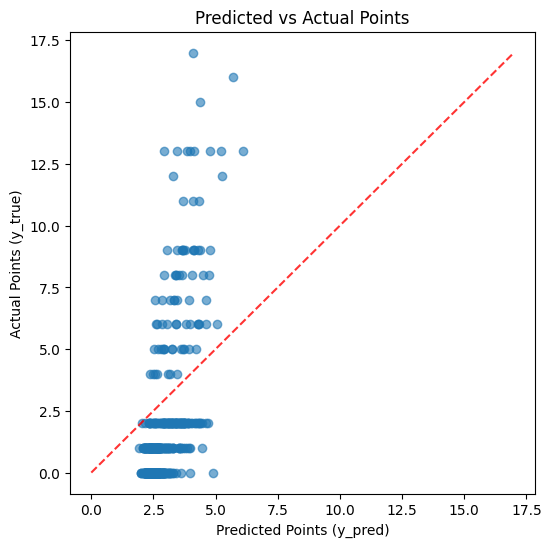

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_pred, y_true, alpha=0.6)

# Add a reference 1:1 line (perfect prediction)
lims = [min(y_true.min(), y_pred.min()), max(y_true.max(), y_pred.max())]
plt.plot(lims, lims, 'r--', alpha=0.8)

plt.xlabel("Predicted Points (y_pred)")
plt.ylabel("Actual Points (y_true)")
plt.title("Predicted vs Actual Points")
plt.show()

In [ ]:
url = 'https://fantasy.premierleague.com/api/entry/{team_id}/history/'